# Exercise 4   

Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?

In [14]:
import math
import numpy as np
import nsfg
import thinkstats2
import thinkplot
%matplotlib inline

In [8]:
from first import MakeFrames, Summarize, PrintExtremes
from first import MakeHists, MakeComparison, main

### reading the data

I’ll start by reading the data and selecting records for live births. The expression in brackets is a boolean Series that selects rows from the DataFrame and returns a new DataFrame.

In [15]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

Next I generate and plot the histogram of `birthwgt_lb` for live births.

When the argument passed to `Hist` is a pandas `Series`, any `nan` values are dropped. `label` is a string that appears in the legend when the `Hist` is plotted.

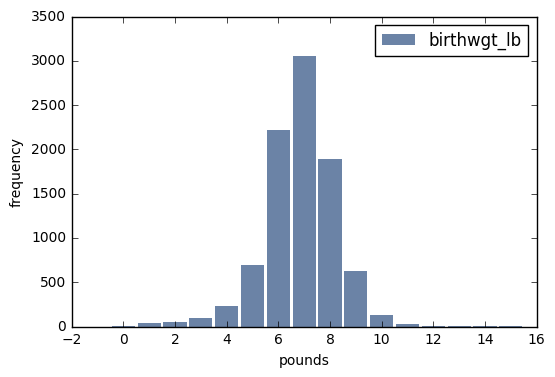

In [22]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

Figure 2.4 shows the histogram of `prglngth`, the length of the pregnancy in weeks. By far the most common value is 39 weeks. The left tail is longer than the right; early babies are common, but pregnancies seldom go past 43 weeks, and doctors often intervene if they do.

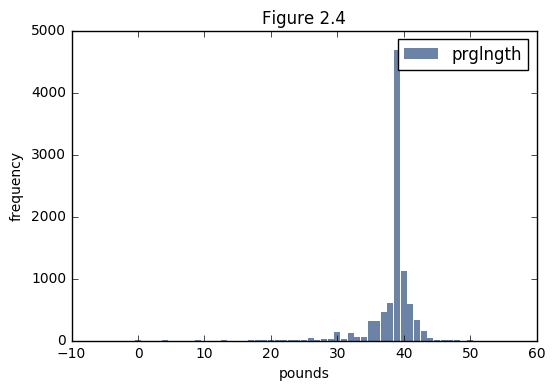

In [30]:
hist = thinkstats2.Hist(live.prglngth, label='prglngth')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency', title='Figure 2.4')

`Hist` provides methods `Largest` and `Smallest`, which take an integer n and return the n largest or smallest values from the histogram

In [29]:
for weeks, freq in hist.Largest():
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


**2.6 First babies**

Now we can compare the distribution of pregnancy lengths for first babies and others. I divided the `DataFrame` of live births using `birthord`, and computed their histograms. Then I plotted their histograms on the same axis:

In [40]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

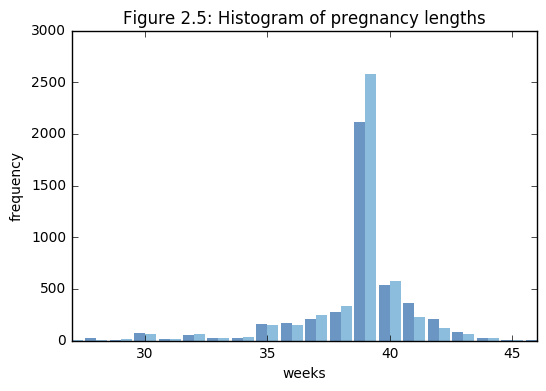

In [41]:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency',
               title="Figure 2.5: Histogram of pregnancy lengths",
               xlim=[27, 46])

Pandas data structures provides methods to compute mean, variance and standard deviation.

For all live births, the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, which means we should expect deviations of 2-3 weeks to be common.

In [42]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std()
print(mean, var, std)

38.5605596852 7.30266206783 2.70234381007


**2.9  Effect size**

An **effect size** is a summary statistic intended to describe (wait for it) the size of an effect. For example, to describe the difference between two groups, one obvious choice is the difference in the means.

In [81]:
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In this example, the difference in means is 0.029 standard deviations, which is small. To put that in perspective, the difference in height between men and women is about 1.7 standard deviations

In [52]:
CohenEffectSize(firsts['prglngth'].values, others['prglngth'].values)

0.028882209288160876

**Exercise 4**   *Using the variable `totalwgt_lb`, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?*

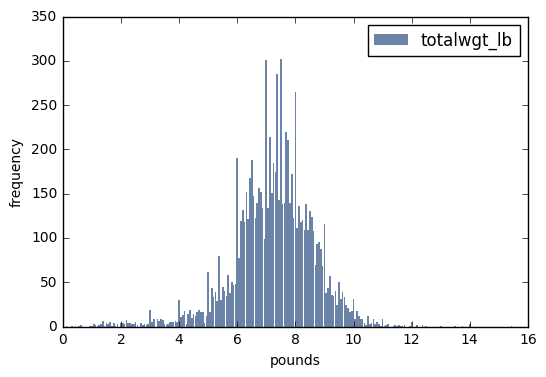

In [74]:
hist = thinkstats2.Hist(live.totalwgt_lb, label='totalwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

In [75]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.totalwgt_lb)
other_hist = thinkstats2.Hist(others.totalwgt_lb)

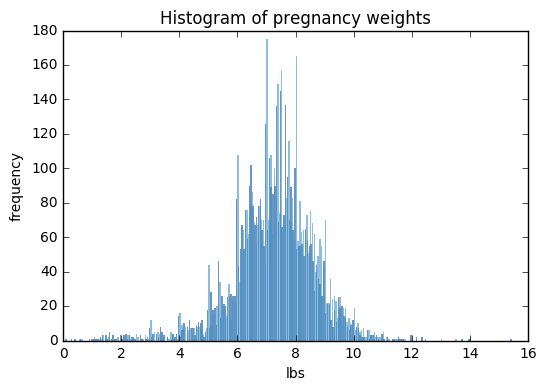

In [85]:
width = 0.05
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='lbs', ylabel='frequency',
               title="Histogram of pregnancy weights",
               xlim=[0, 16])

In [86]:
mean = live.totalwgt_lb.mean()
var = live.totalwgt_lb.var()
std = live.totalwgt_lb.std()
print(mean, var, std)

7.26562845762 1.98329042883 1.40829344557


In [91]:
CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

-0.088672927072601743

In [93]:
firsts['totalwgt_lb'].values

array([ 8.8125,  9.125 ,  8.5625, ...,  6.375 ,  6.375 ,  6.1875])

In [92]:
firsts.totalwgt_lb

0         8.8125
2         9.1250
5         8.5625
8         7.5625
10        7.8125
11        7.0000
15        7.6875
17        6.3125
19        8.7500
21        5.5625
23        6.7500
26        8.1250
27        7.1250
31        8.0000
32        7.5000
35        4.9375
39        7.1250
42        6.0000
44        7.9375
48        6.1875
52       10.5000
55        9.6250
58        6.1250
60        5.6250
62        6.8750
65        5.8125
67        7.1250
68        6.8125
70        6.3125
72        7.7500
          ...   
13502     6.0000
13506     7.7500
13509     5.5625
13511     6.1875
13516     7.0000
13518     8.8750
13519        NaN
13520     5.5000
13522     6.1250
13525     8.3750
13528     8.8750
13531     6.9375
13537     8.3125
13538     7.6250
13544     5.8125
13547     4.1250
13551     5.3750
13555     6.1250
13559     7.8750
13560     7.8750
13562     8.1250
13565     8.1250
13566     7.5000
13569     5.8125
13573     6.5625
13576     6.4375
13578     6.0000
13581     6.37